## Experiencia IV: Redes Bayesiana
### Taller de Minería de Datos Avanzados
### Profesores:
### Dr. Max Chacón Pacheco
### Dr. Felipe Bello Robles
### Experiencia realizada por Miguel Salinas González




Importación de librerías a utilizar.

bnlearn para el uso de los algoritmos de Redes Bayesianas, además contiene el set de datos en cuestión.

In [2]:
install.packages("bnlearn")
library(bnlearn)

Installing package into 'C:/Users/Miguel - PC/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'bnlearn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Miguel - PC\AppData\Local\Temp\RtmpQt22rp\downloaded_packages


Warning message:
"package 'bnlearn' was built under R version 4.3.2"


### Configuración de los gráficos
Se configuran los gráficos, para que sean más grandes y así notar mejor las relaciones resultantes


In [13]:
# Ajustar el tamaño de los gráficos por defecto
options(repr.plot.width = 20, repr.plot.height = 20)


### Aplicando Hill-Climbing
El método Hill-Climbing en el contexto de las redes bayesianas es un algoritmo de aprendizaje estructural que se utiliza para estimar la estructura de una red bayesiana a partir de datos. Es un enfoque heurístico basado en la búsqueda local para encontrar una estructura de red que mejor se adapte a un conjunto de datos dado.


  Bayesian network learned via Score-based methods

  model:
   [HIST][HRBP][PAP][FIO2][ANES][ERCA][LVF|HIST][PMB|PAP][ERLO|HRBP][PCWP|LVF]
   [HR|HRBP:ERLO][HREK|HR:ERCA][HRSA|HR:ERCA][LVV|PCWP:LVF][CCHL|HR][CVP|LVV]
   [MINV|CCHL][STKV|LVF:LVV][CO|STKV:HR][HYP|LVV:STKV][VALV|MINV][INT|MINV:VALV]
   [PVS|FIO2:VALV][ACO2|CCHL:VALV][PRSS|INT:VALV][SHNT|PMB:INT]
   [VLNG|MINV:INT:VALV][SAO2|SHNT:PVS][ECO2|ACO2:VLNG][KINK|PRSS:VLNG]
   [VTUB|PRSS:MINV:INT][TPR|SAO2:CCHL][DISC|VTUB][BP|TPR:CO][APL|TPR]
   [VMCH|DISC:VTUB][MVS|VMCH]
  nodes:                                 37 
  arcs:                                  53 
    undirected arcs:                     0 
    directed arcs:                       53 
  average markov blanket size:           3.46 
  average neighbourhood size:            2.86 
  average branching factor:              1.43 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:       

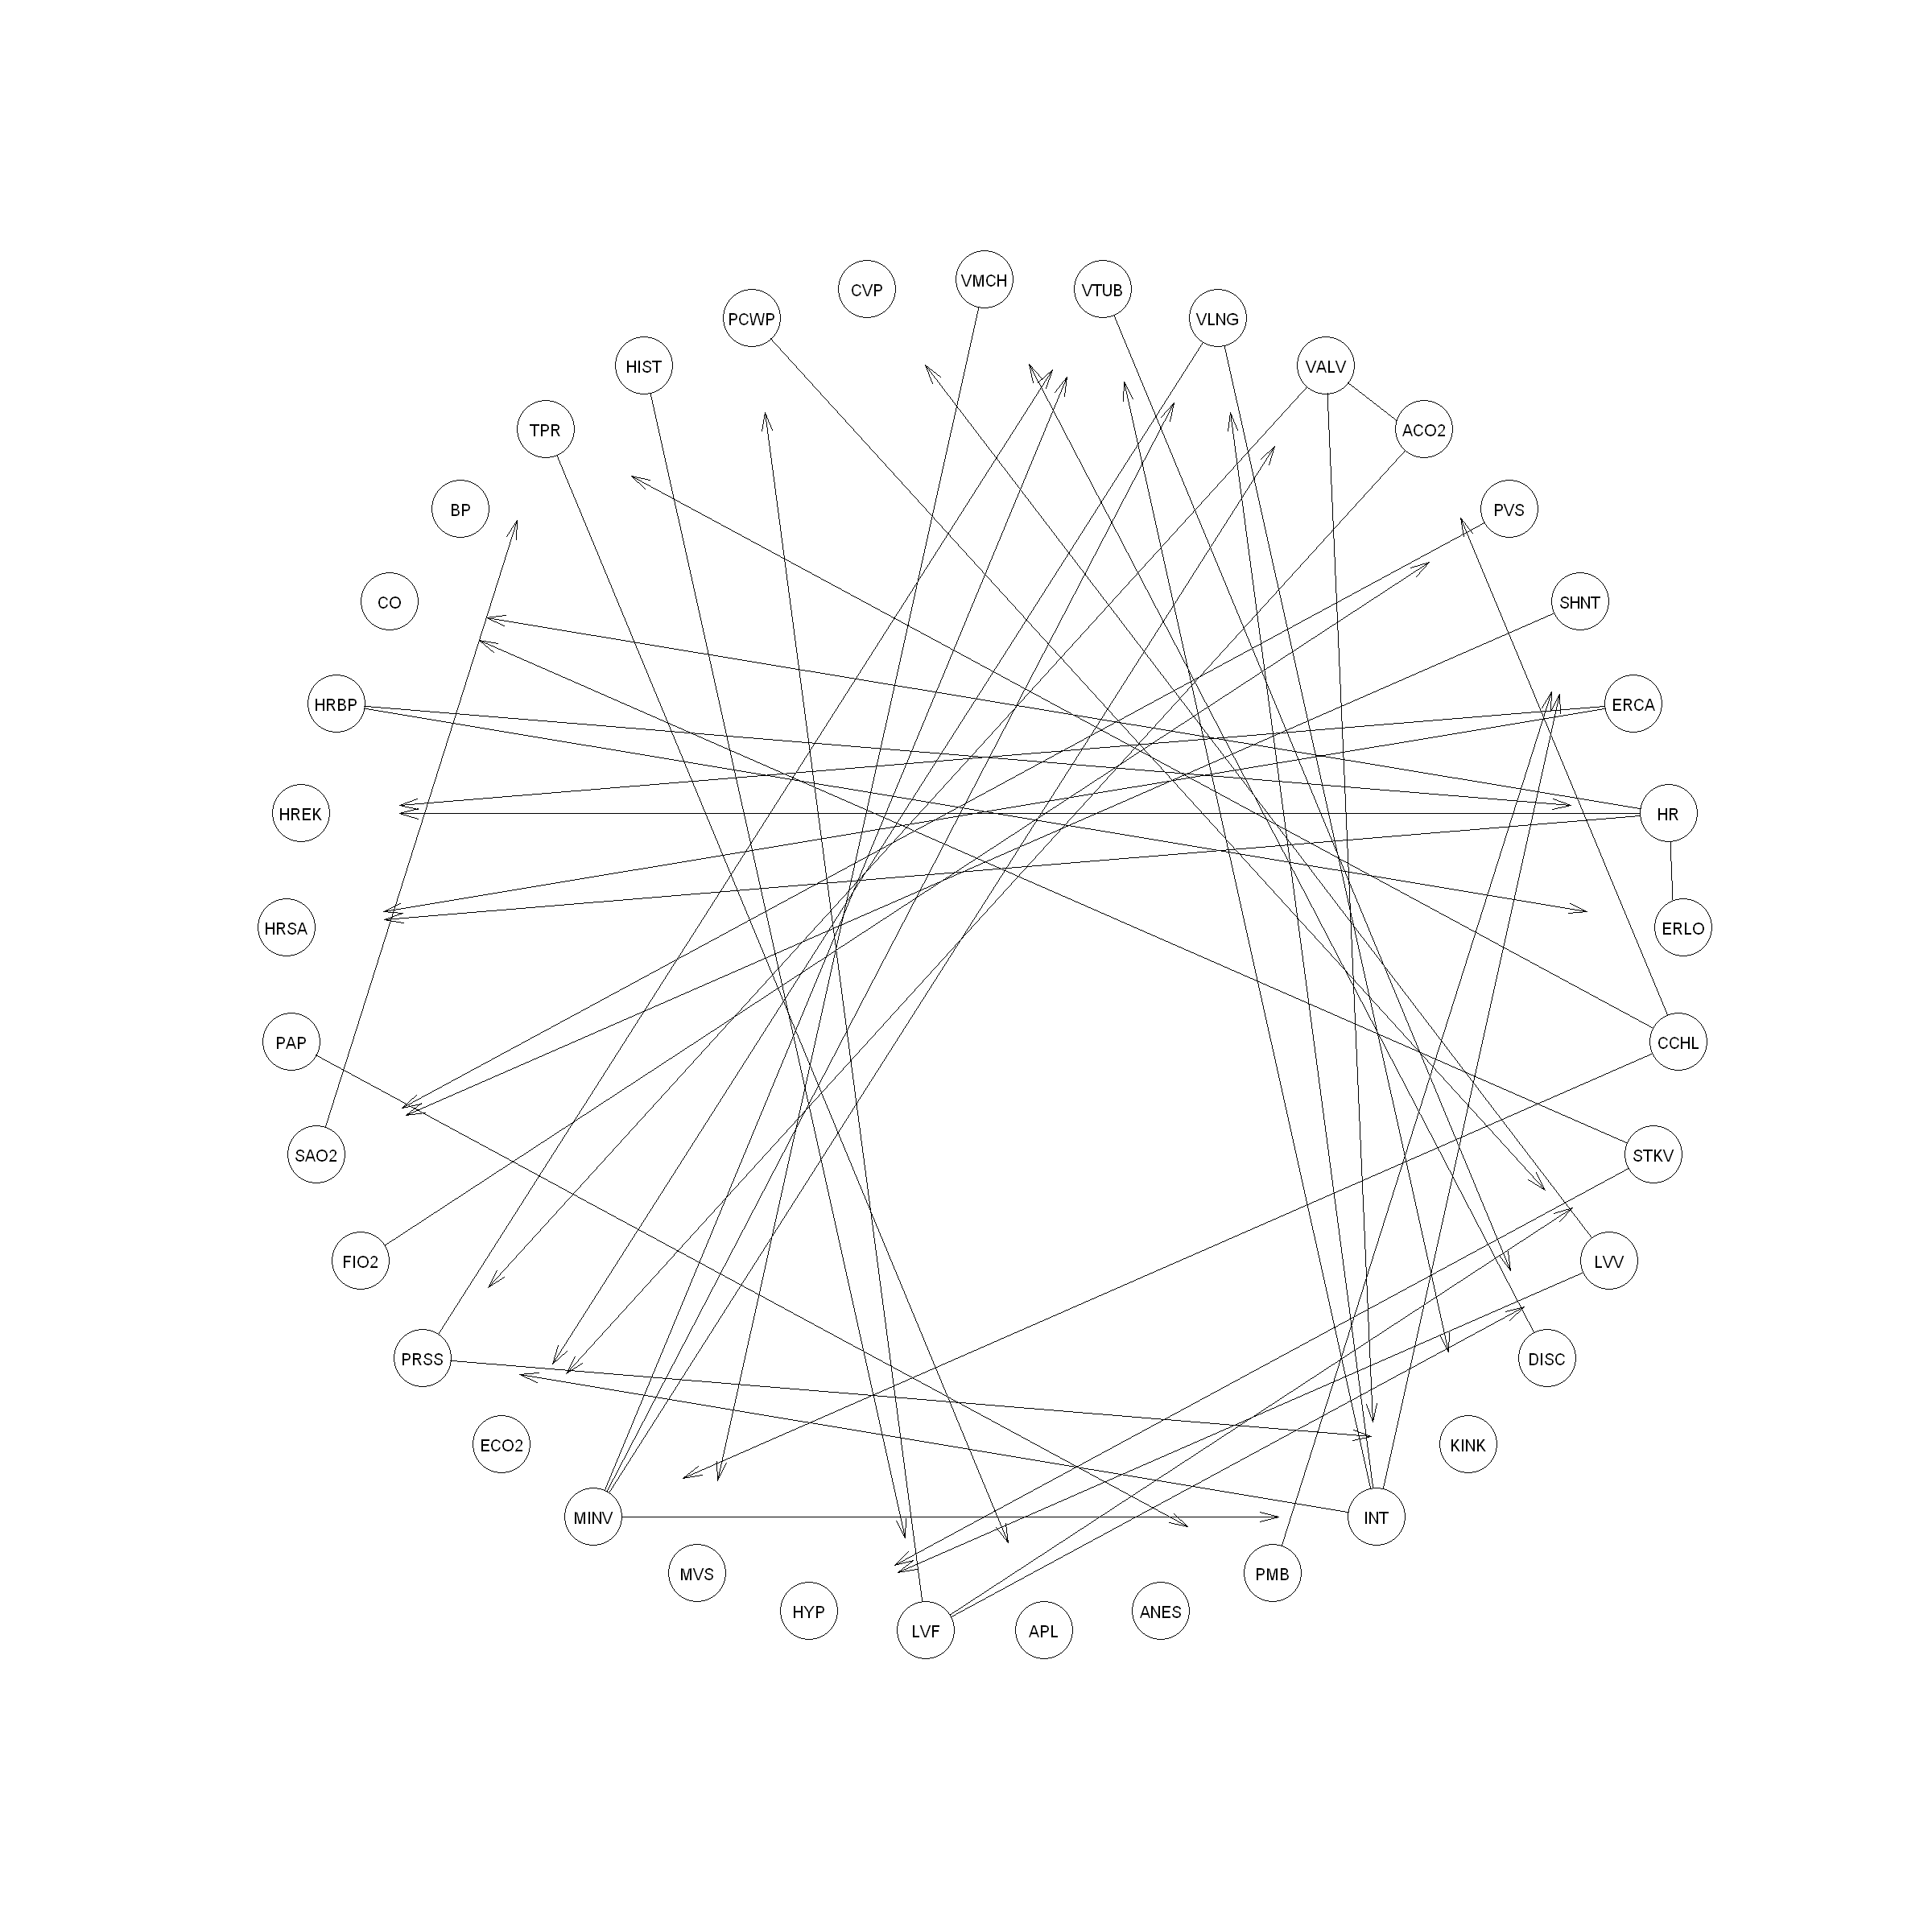

In [14]:
# load the data.
data(alarm)
# create and plot the network structure.
df <- alarm
res <- hc(df)
plot(res)
print(res)
sc<-score(res,df) # BIC por default
print(sc)


### Aplicando MMPC (Max-Min Parents and Children)
El método Max-Min Parents and Children (MMPC) es un algoritmo utilizado en el aprendizaje de redes bayesianas, especialmente para la selección de las variables más relevantes (padres y niños) asociadas con cada variable objetivo en un conjunto de datos. El objetivo principal del MMPC es identificar un subconjunto de variables que son condicionalmente dependientes de la variable objetivo, reduciendo así la complejidad del proceso de aprendizaje de la red.


  Bayesian network learned via Constraint-based methods

  model:
    [undirected graph]
  nodes:                                 37 
  arcs:                                  32 
    undirected arcs:                     32 
    directed arcs:                       0 
  average markov blanket size:           1.73 
  average neighbourhood size:            1.73 
  average branching factor:              0.00 

  learning algorithm:                    Max-Min Parent Children 
  conditional independence test:         Mutual Information (disc.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  8063 



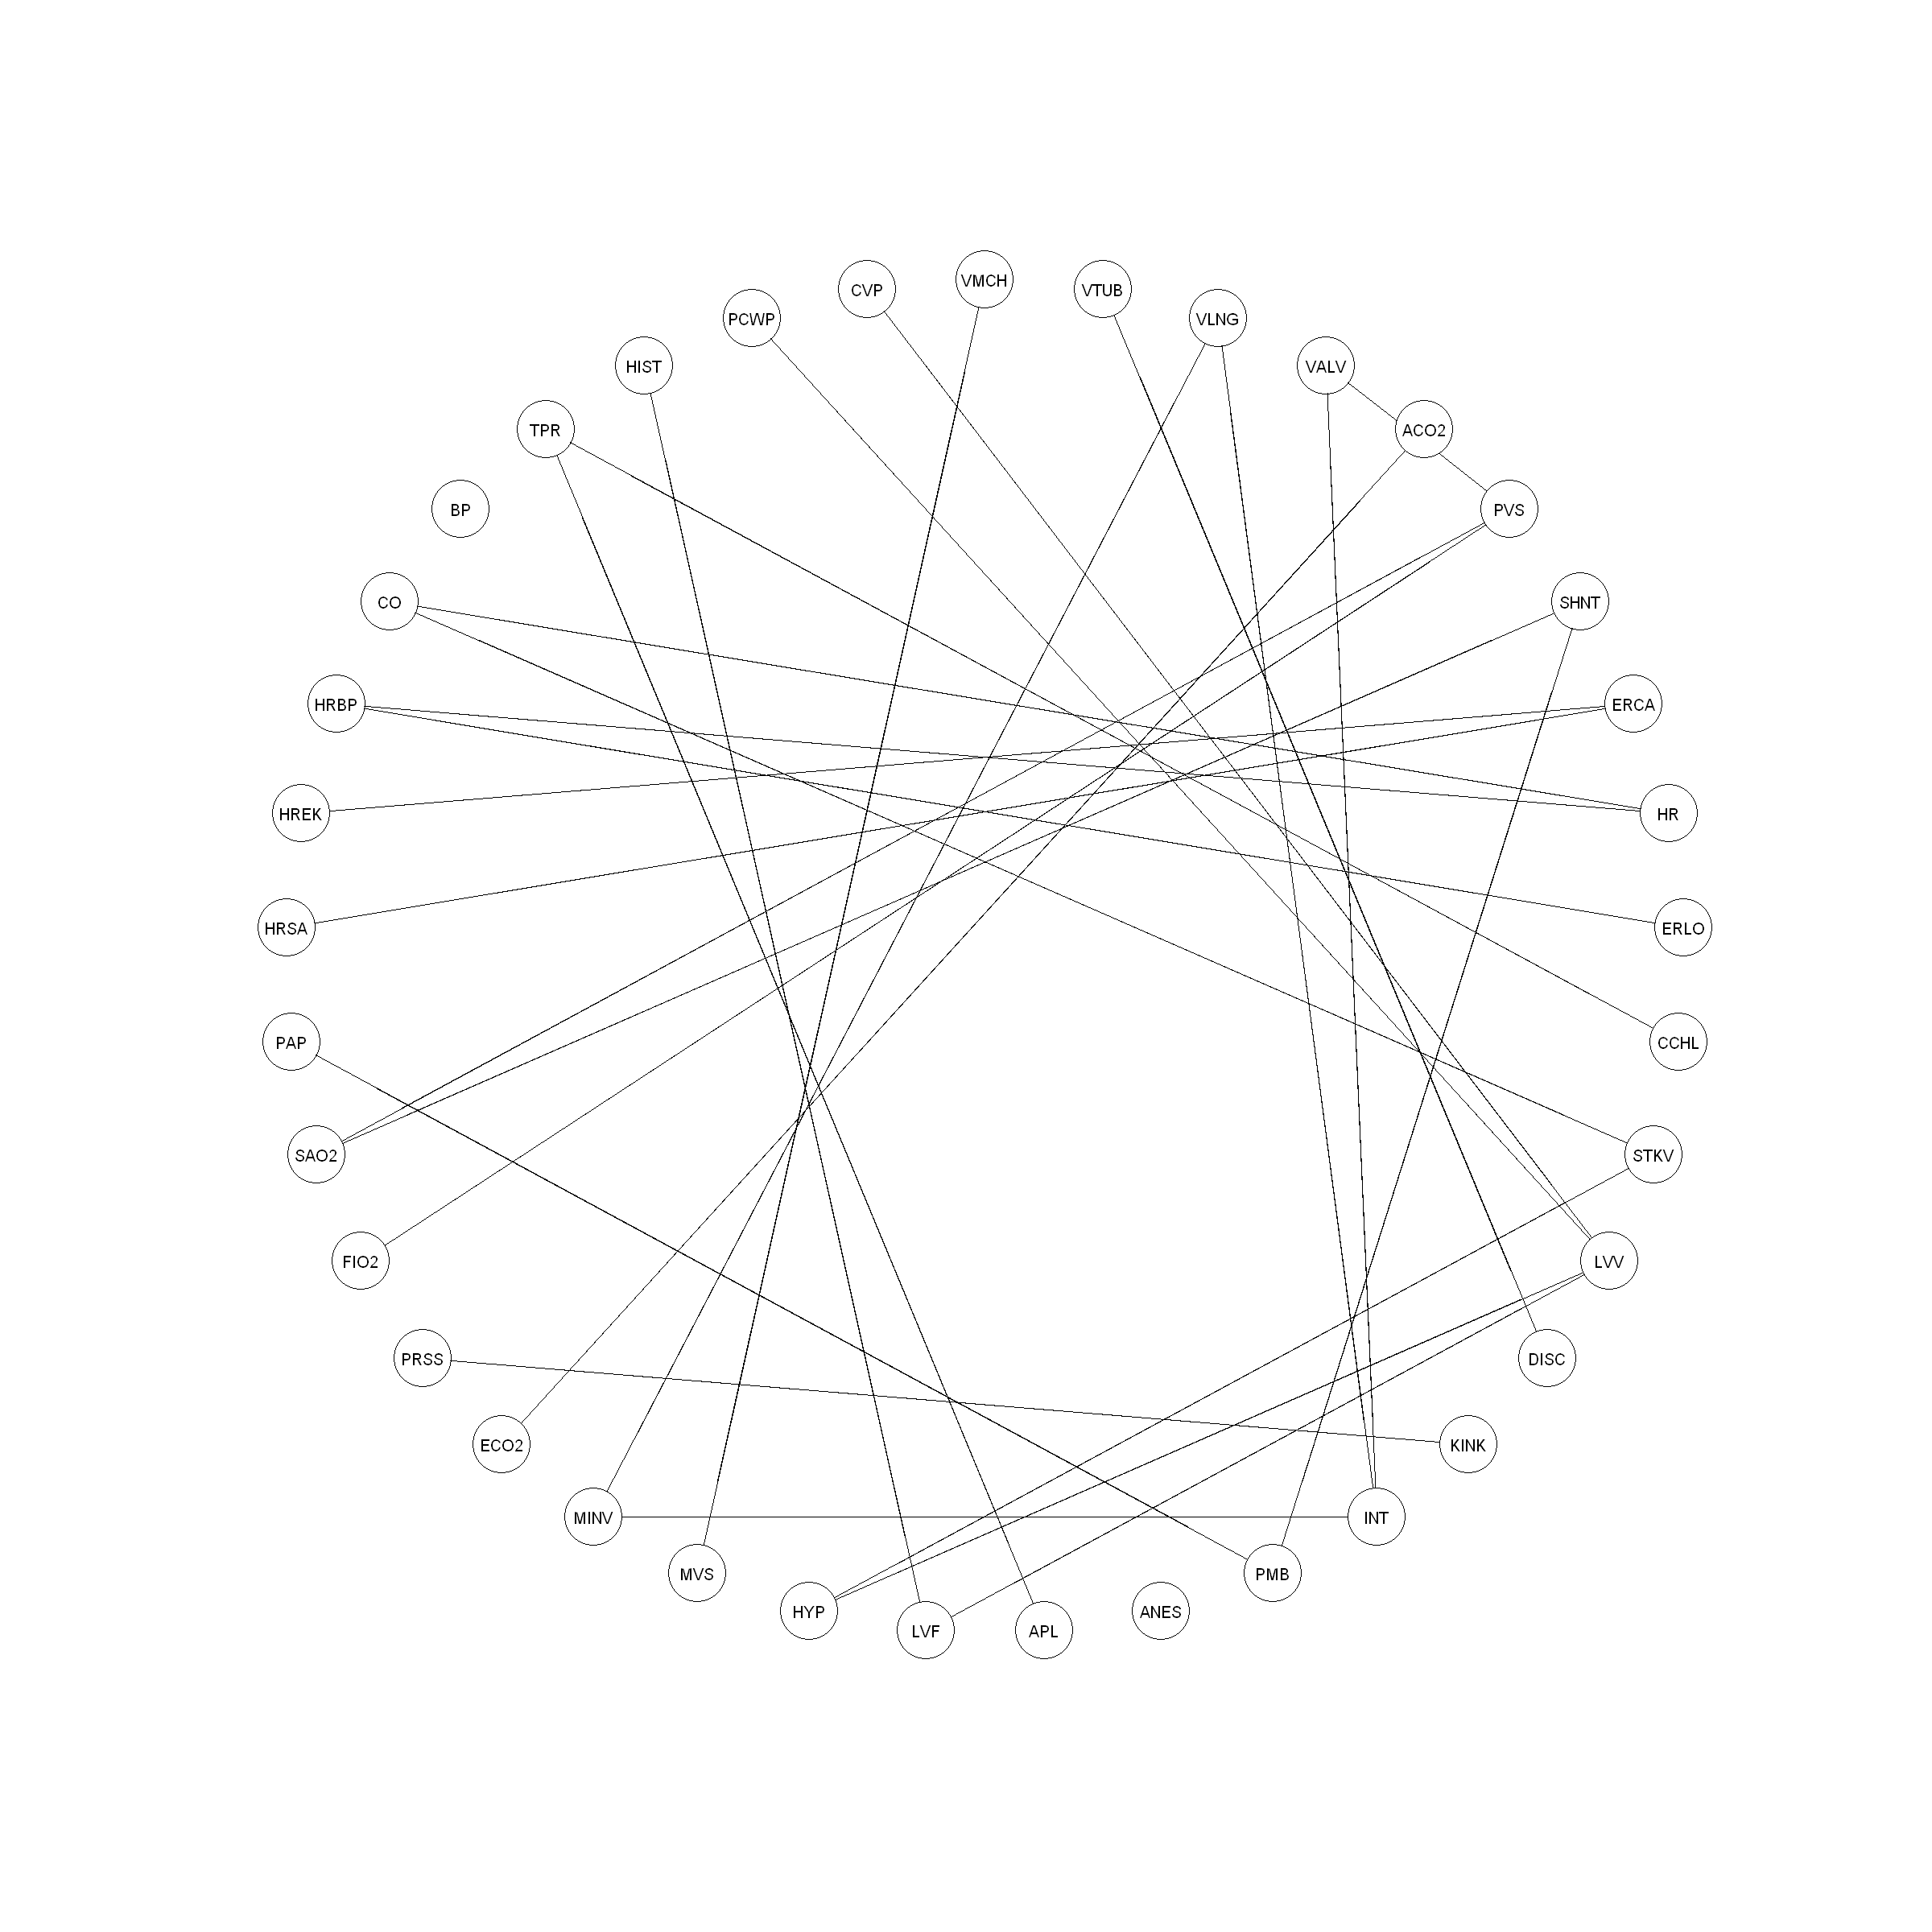

In [15]:
# create and plot the network structure.
df <- alarm
res <- mmpc(df)
plot(res)
print(res)
#sc<-score(res,df) # BIC por default
#print(sc)

### Aplicando Max-Min Hill-Climbing
El método Max-Min Hill-Climbing (MMHC) es una variante del algoritmo de Hill-Climbing tradicional diseñado para aprender la estructura de redes bayesianas a partir de datos. Esta metodología combina dos enfoques: el Max-Min Parents and Children (MMPC) para la selección de variables y el Hill-Climbing para la optimización de la estructura de la red.


  Bayesian network learned via Hybrid methods

  model:
   [PCWP][TPR][HRBP][HREK][PAP][PRSS][ECO2][ANES][DISC][PVS][VMCH][HRSA|HREK]
   [FIO2|PVS][MVS|VMCH][APL|TPR][PMB|PAP][KINK|PRSS][LVV|PCWP][CCHL|TPR]
   [ERLO|HRBP][HR|HRBP][ACO2|ECO2][VALV|PVS][VTUB|DISC:VMCH][CVP|LVV][HYP|LVV]
   [LVF|LVV][INT|VALV][ERCA|HREK:HRSA][SHNT|PMB][HIST|LVF][SAO2|SHNT:PVS]
   [MINV|INT][STKV|HYP][CO|STKV:HR][VLNG|MINV:INT][BP|TPR:CO]
  nodes:                                 37 
  arcs:                                  32 
    undirected arcs:                     0 
    directed arcs:                       32 
  average markov blanket size:           1.95 
  average neighbourhood size:            1.73 
  average branching factor:              0.86 

  learning algorithm:                    Max-Min Hill-Climbing 
  constraint-based method:               Max-Min Parent Children 
  conditional independence test:         Mutual Information (disc.) 
  score-based method:                    Hill-Climbing 
 

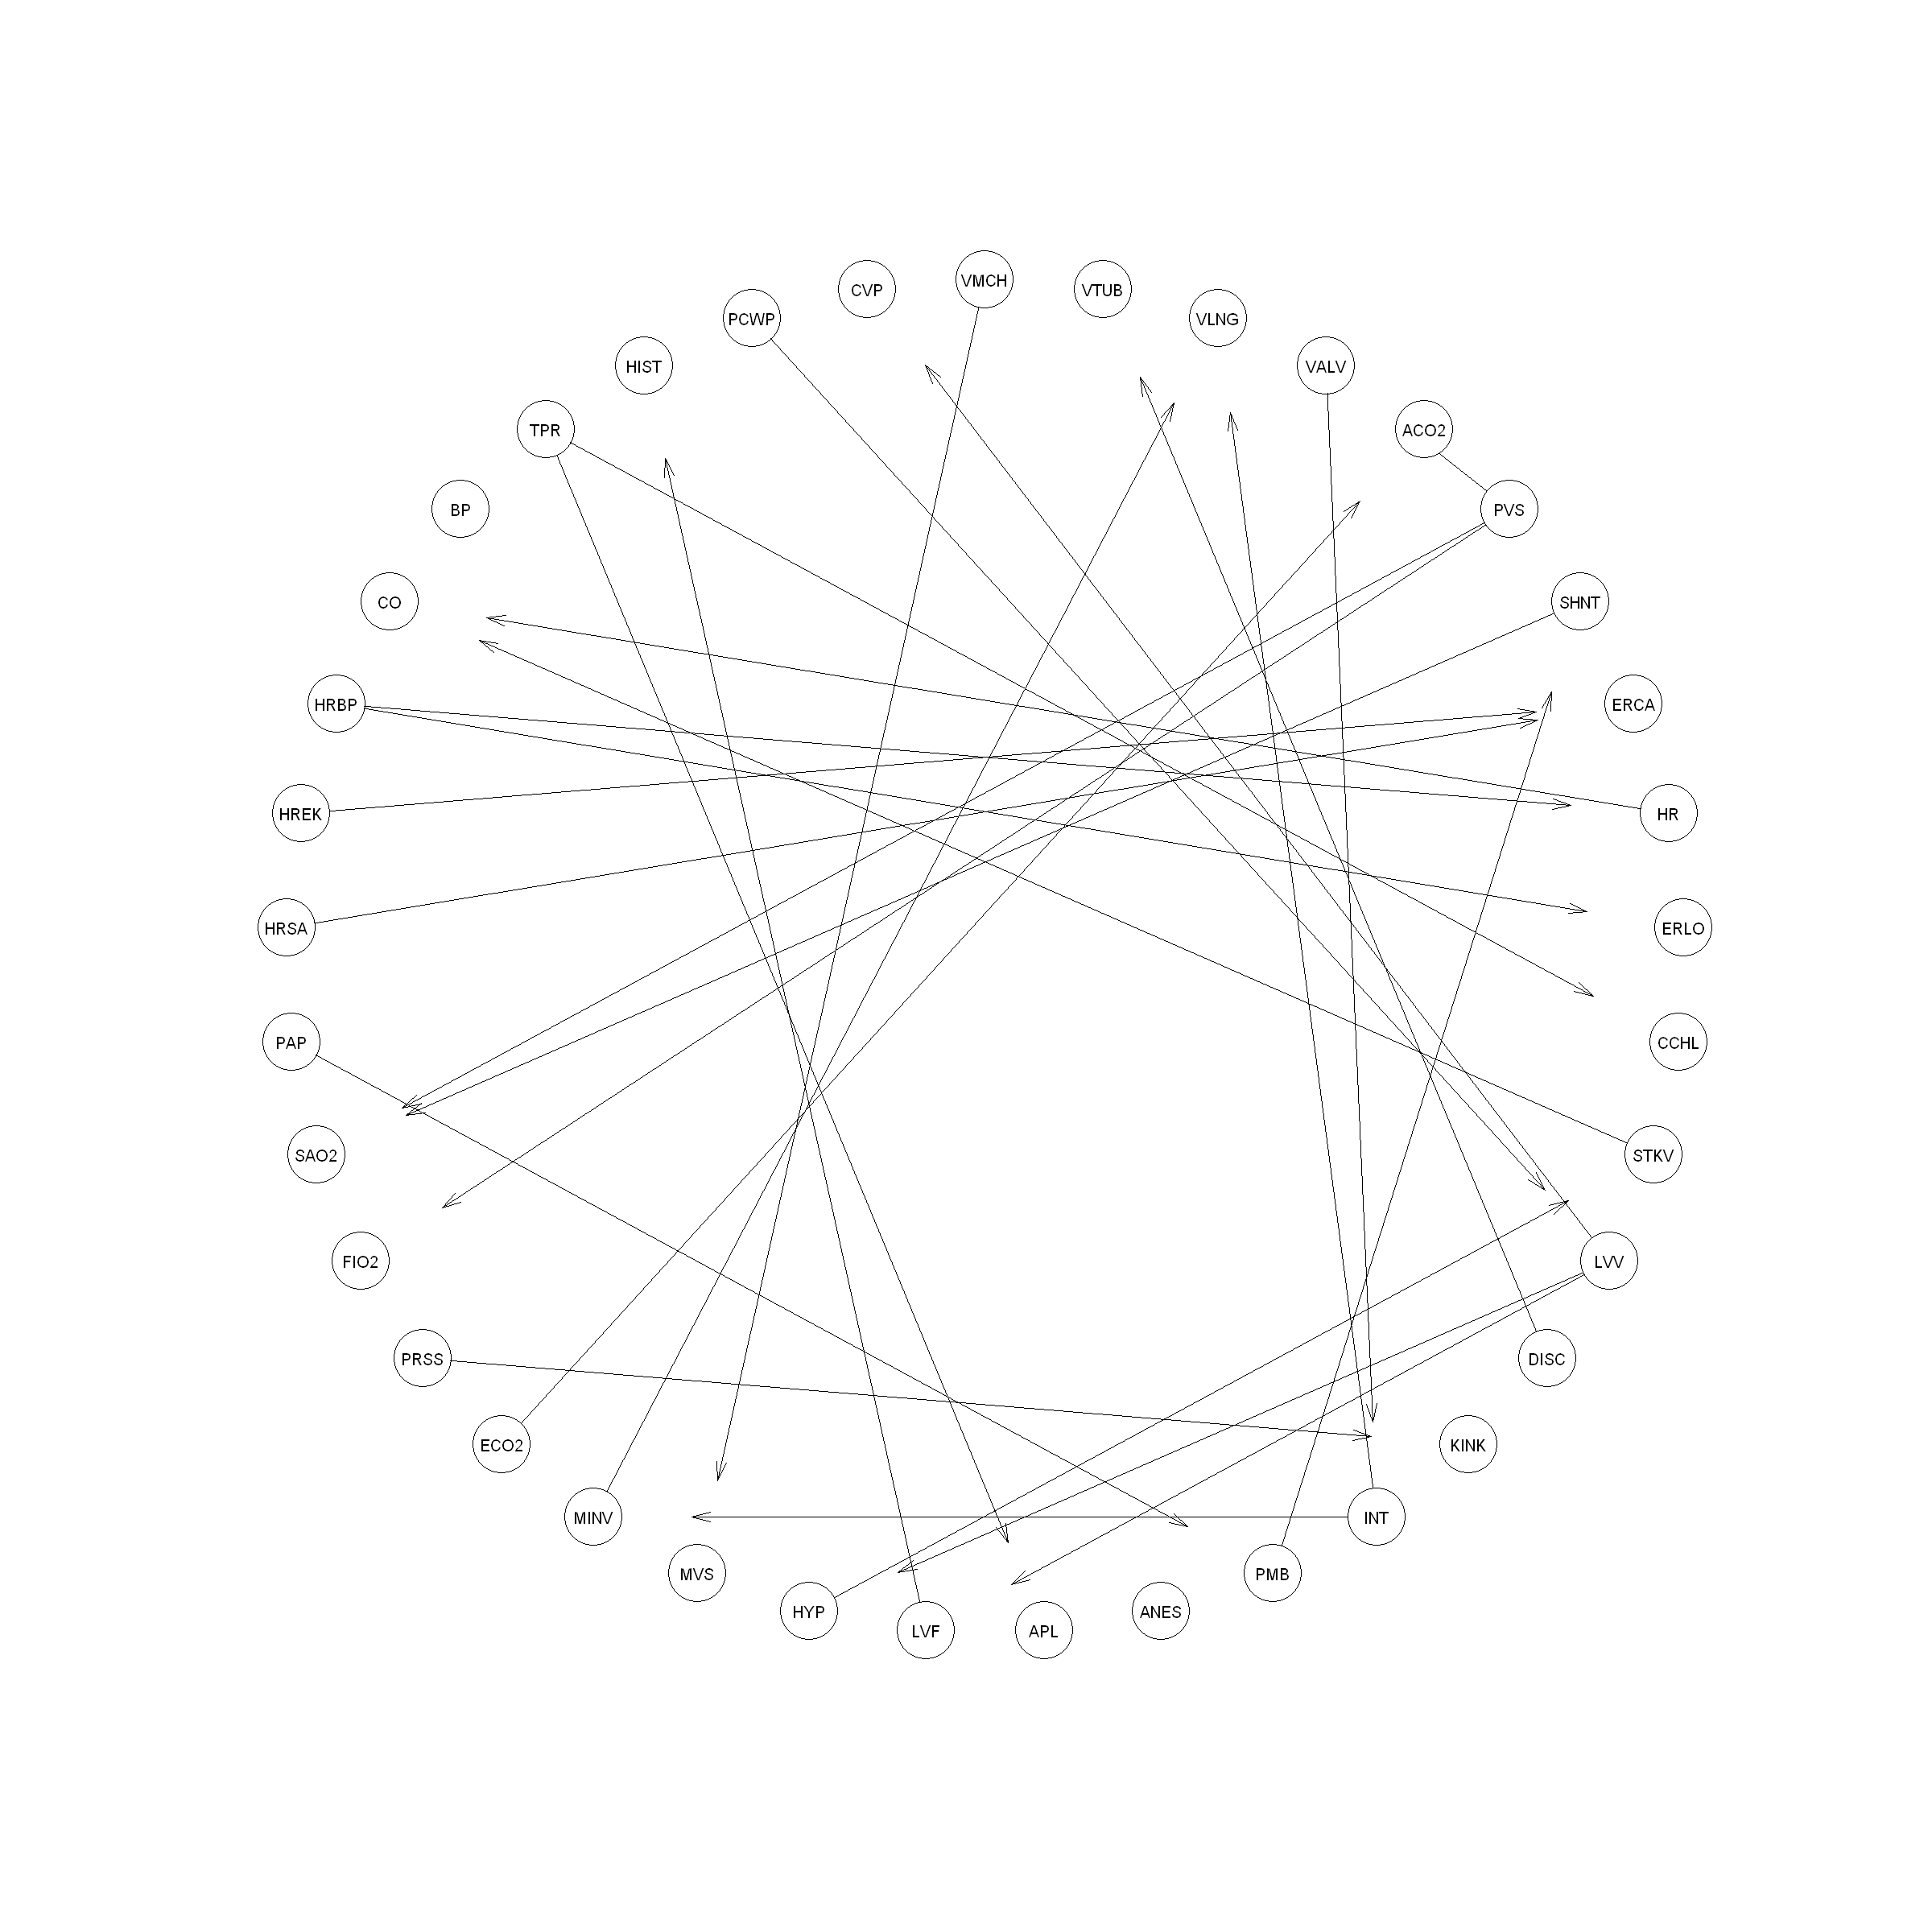

In [16]:
# create and plot the network structure.
df <- alarm
res <- mmhc(df)
plot(res)
print(res)
sc<-score(res,df) # BIC por default
print(sc)

### Comparando los distintos modelos
La estructura de referencia para este problema, fue extraída de I. A. Beinlich, H. J. Suermondt, R. M. Chavez, and G. F. Cooper. The ALARM Monitoring System: A Case Study with Two Probabilistic Inference Techniques for Belief Networks.
![modelo](./theory_model.jpg)
Este modelo se puede observar que los notodos de medición son los que se encuentran rellenados con puntos, los nodos intermedios son los que su relleno es vacío y los nodos de diagnóstico son los de relleno ennegrecido.

### Ajuste


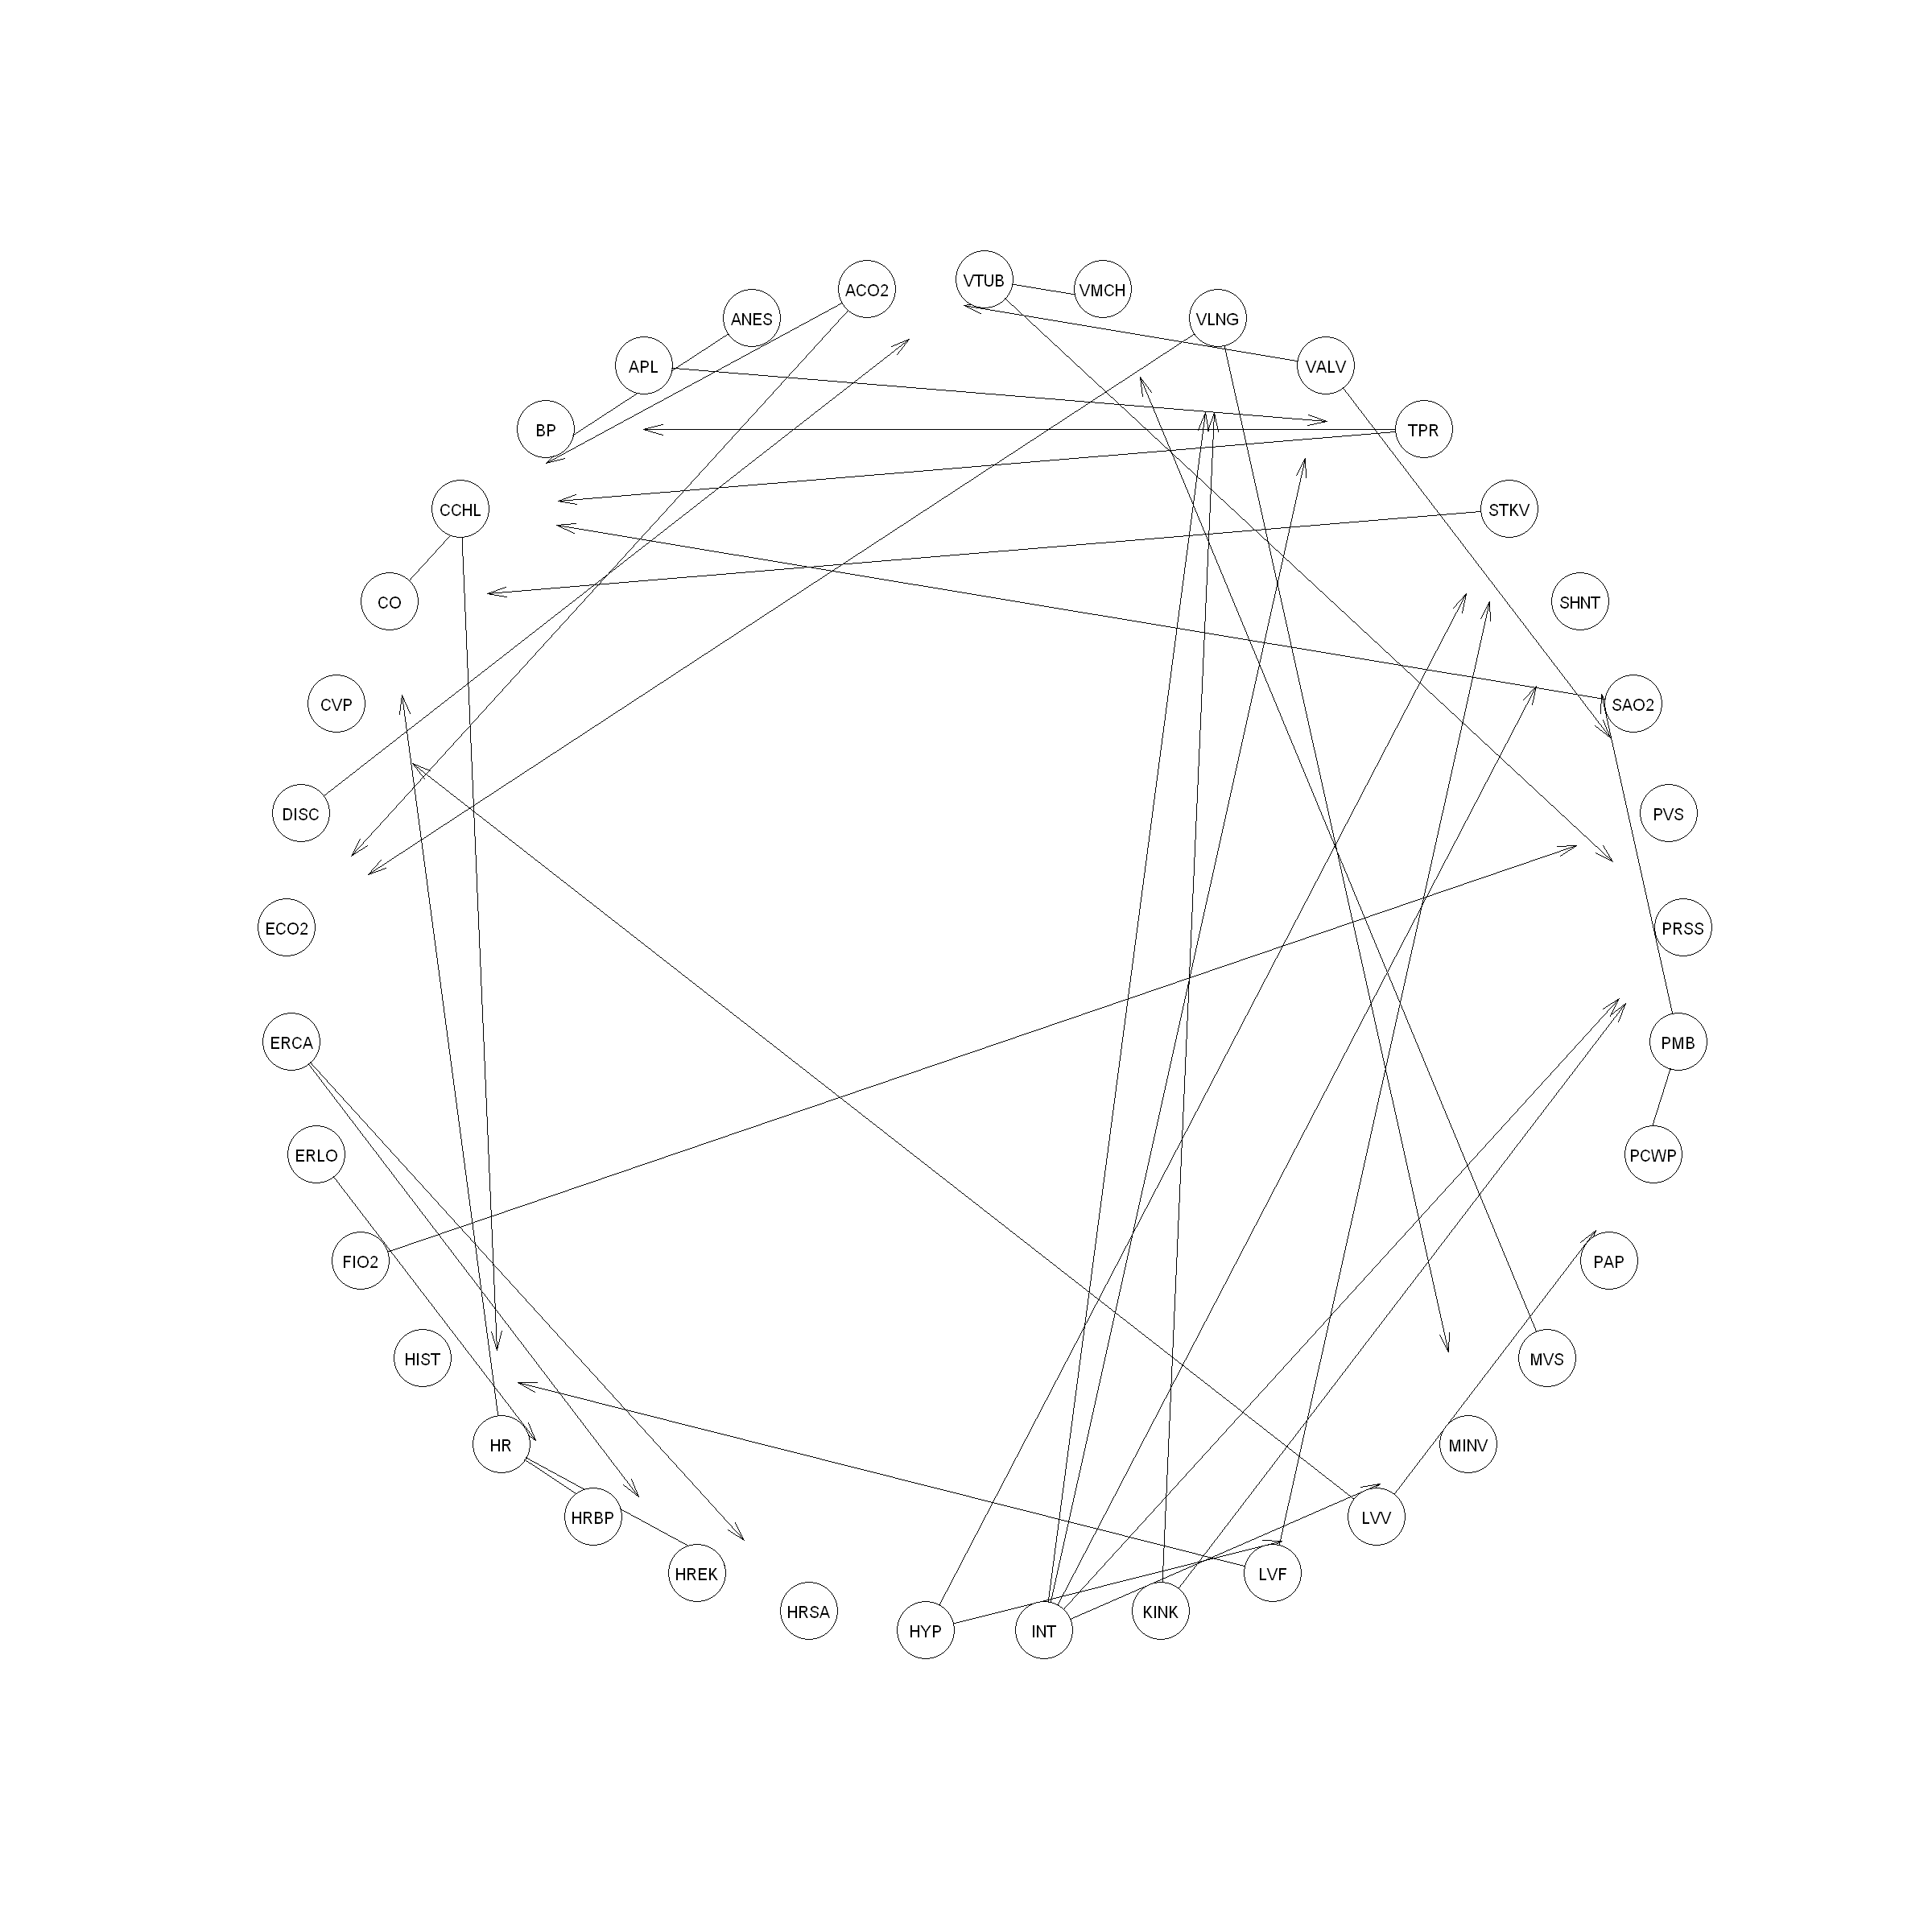